In [100]:
import pandas as pd
import numpy as np
import plotnine as pn
from matplotlib import pyplot as plt
import plotly.express as px

In [101]:
tow = pd.read_excel('tow.xlsx')

In [102]:
tow.head()

,pairing_id,round,player1_name,player2_name,player1_result,player2_result,player1_score,player2_score,event_name,event_date,...,Points,Rounds,Ruleset,Full Data,Mirror Match?,Players,Legacy Lists,Allies,Rule of 3,Faction v Faction
0,405136,1,Ridvan Martinez,David Clarke,2.0,0.0,1770.0,901.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,N,N,12,Y,NaN,NaN,Wood Elf Realms
1,405155,1,Mike Summerfeldt,Russ Jeffery,0.0,2.0,450.0,1920.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Warriors of ChaosWood Elf Realms
2,405171,1,Brandon Deamer,Eddie Crampton,2.0,0.0,1745.0,1531.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Tomb Kings of KhemriHigh Elf Realms
3,405192,1,taylor hanson,Luka Pavicevic,0.0,2.0,867.0,1205.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Kingdom of BretonniaDwarfen Mountain Holds
4,405199,1,Eric Locke,Danny Stewart,0.0,2.0,815.0,1206.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,N,N,12,Y,NaN,NaN,Ogre Kingdoms


In [103]:
tow.shape

(2030, 31)

In [104]:
tow = tow.query("`Mirror Match?` == 'N'")
tow.shape

(1836, 31)

In [105]:
tow = tow.query("`Full Data` == 'Y'")
tow.shape

(1616, 31)

In [106]:
tow = tow.query("Players >= 10")
tow.shape

(1429, 31)

In [107]:
tow_2000 = tow.query('Points == 2000')
tow_2000.shape

(755, 31)

In [108]:
display(tow_2000)

,pairing_id,round,player1_name,player2_name,player1_result,player2_result,player1_score,player2_score,event_name,event_date,...,Points,Rounds,Ruleset,Full Data,Mirror Match?,Players,Legacy Lists,Allies,Rule of 3,Faction v Faction
1,405155,1,Mike Summerfeldt,Russ Jeffery,0.0,2.0,450.0,1920.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Warriors of ChaosWood Elf Realms
2,405171,1,Brandon Deamer,Eddie Crampton,2.0,0.0,1745.0,1531.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Tomb Kings of KhemriHigh Elf Realms
3,405192,1,taylor hanson,Luka Pavicevic,0.0,2.0,867.0,1205.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Kingdom of BretonniaDwarfen Mountain Holds
6,405234,2,Danny Stewart,Luka Pavicevic,2.0,0.0,2000.0,0.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Ogre KingdomsDwarfen Mountain Holds
7,405244,2,Ridvan Martinez,Brandon Deamer,2.0,0.0,1466.0,900.0,The First Old World Forgemaster,2024-02-03 14:00:00,...,2000,3,v1.1,Y,N,12,Y,NaN,NaN,Wood Elf RealmsTomb Kings of Khemri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,431012,3,Zach Thompson,Jordon Weatherwax,0.0,2.0,10.0,23.0,WARHAMMER THE OLD WORLD RTT Presented by SQUA...,2024-04-20 15:30:00,...,2000,3,v1.2,Y,N,24,Y,NaN,NaN,Wood Elf RealmsTomb Kings of Khemri
2010,431036,3,Daniel LaBore,Steven Knott,0.0,2.0,1.0,25.0,WARHAMMER THE OLD WORLD RTT Presented by SQUA...,2024-04-20 15:30:00,...,2000,3,v1.2,Y,N,24,Y,NaN,NaN,Empire of ManChaos Dwarfs
2012,431073,3,Craig Stueber,Kris Jones,2.0,0.0,18.0,9.0,WARHAMMER THE OLD WORLD RTT Presented by SQUA...,2024-04-20 15:30:00,...,2000,3,v1.2,Y,N,24,Y,NaN,NaN,Wood Elf RealmsEmpire of Man
2013,431088,3,Todd Wiatt,Austin Wingfield,0.0,2.0,0.0,24.0,WARHAMMER THE OLD WORLD RTT Presented by SQUA...,2024-04-20 15:30:00,...,2000,3,v1.2,Y,N,24,Y,NaN,NaN,Warriors of ChaosBeastmen Brayherds


In [109]:
player1_db = tow[['player1_faction', 'player2_faction' ,'player1_result']].rename(columns={"player1_faction": "player_faction", "player2_faction" : "opponent_faction", "player1_result" : "result"})
player2_db = tow[['player2_faction', 'player1_faction', 'player2_result']].rename(columns={"player2_faction": "player_faction", "player1_faction" : "opponent_faction", "player2_result" : "result"})
player_db = pd.concat([player1_db, player2_db])
display(player_db)

,player_faction,opponent_faction,result
1,Warriors of Chaos,Wood Elf Realms,0.0
2,Tomb Kings of Khemri,High Elf Realms,2.0
3,Kingdom of Bretonnia,Dwarfen Mountain Holds,0.0
6,Ogre Kingdoms,Dwarfen Mountain Holds,2.0
7,Wood Elf Realms,Tomb Kings of Khemri,2.0
...,...,...,...
2025,High Elf Realms,Dark Elves,2.0
2026,Kingdom of Bretonnia,Skaven,0.0
2027,Tomb Kings of Khemri,Ogre Kingdoms,2.0
2028,Orc and Goblin Tribes,Daemons of Chaos,0.0


In [110]:
tk_db = player_db.query("player_faction == 'Tomb Kings of Khemri'").groupby(['opponent_faction'])['player_faction'].count()
tk_wins = player_db.query("player_faction == 'Tomb Kings of Khemri' & result == 2.0").groupby('opponent_faction')['result'].count()
tk_db = pd.concat([tk_db, tk_wins], axis=1).rename(columns={"player_faction": "games_played", "result": "wins"})
tk_db['win_rate_by_faction'] = tk_db['wins']/tk_db['games_played']
tk_db = tk_db.reset_index()
tk_db

,opponent_faction,games_played,wins,win_rate_by_faction
0,Beastmen Brayherds,19,5,0.263158
1,Chaos Dwarfs,4,2,0.500000
2,Daemons of Chaos,7,4,0.571429
3,Dark Elves,6,5,0.833333
4,Dwarfen Mountain Holds,24,15,0.625000
5,Empire of Man,31,22,0.709677
6,High Elf Realms,16,7,0.437500
7,Kingdom of Bretonnia,56,28,0.500000
8,Lizardmen,13,6,0.461538
9,Ogre Kingdoms,6,2,0.333333


In [111]:
tk_db['games_played'].sum()

304

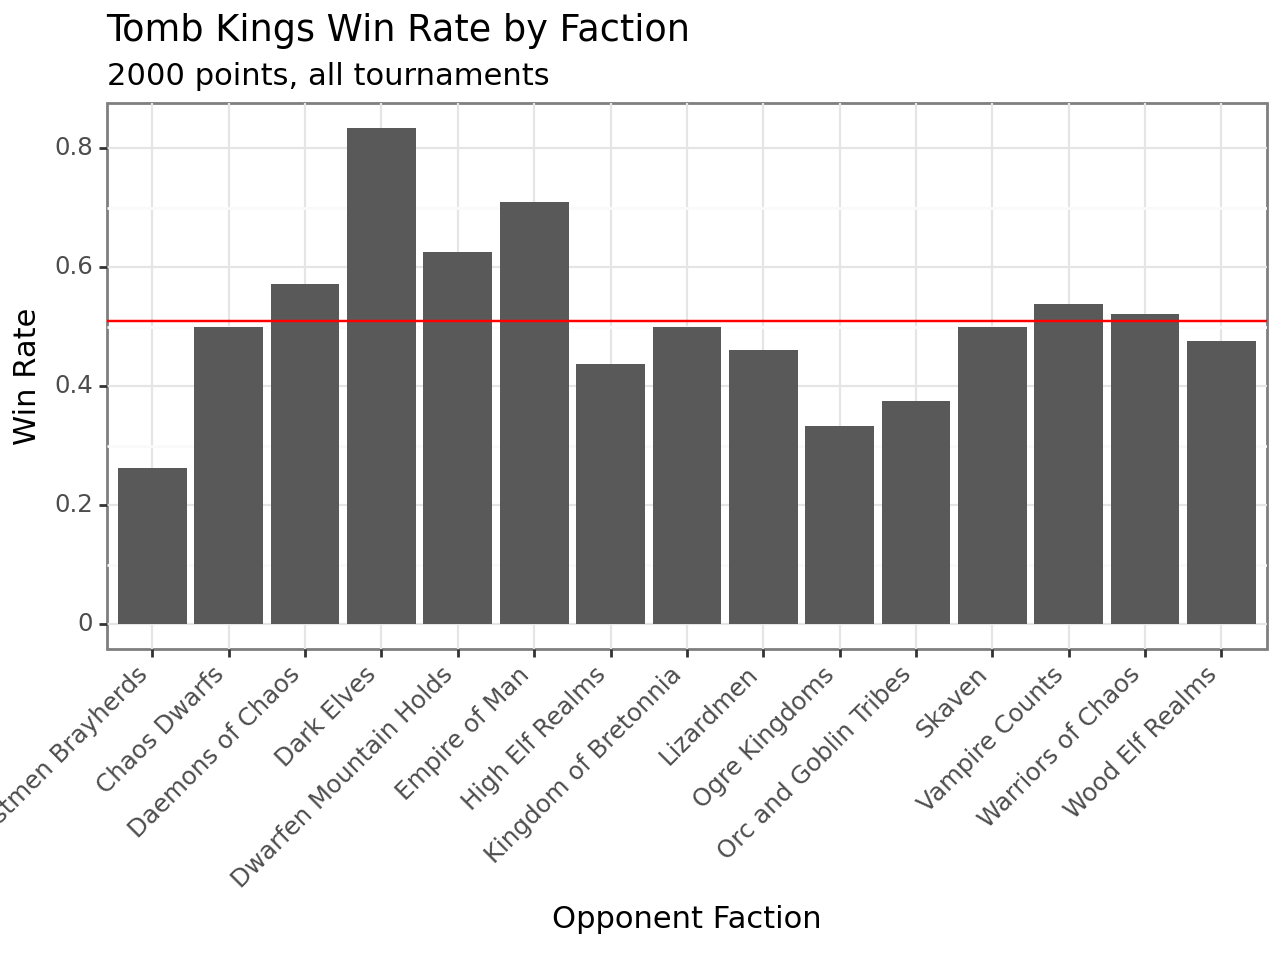

<Figure Size: (640 x 480)>

In [112]:
pn.ggplot(tk_db) + pn.aes(x='opponent_faction', y='win_rate_by_faction') + pn.geom_bar(stat = 'identity') + pn.geom_abline(intercept=tk_db['win_rate_by_faction'].mean(), slope=0, color="red") + pn.theme_bw() + pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1)) + pn.labs(title="Tomb Kings Win Rate by Faction", subtitle='2000 points, all tournaments', x="Opponent Faction", y='Win Rate')



In [113]:
tk_db['win_rate_by_faction'].mean()

0.5096969574473819